In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [2]:
DATA_PATH = os.path.join('data')
OUTPUT_CSV = os.path.join(DATA_PATH,'output','california_housing_with_missing.csv')

In [3]:
california_housing_data  = fetch_california_housing()

df_target = pd.DataFrame(california_housing_data.target, columns=['HousingPrices'])
pd.concat([df_target.head(3), df_target.tail(3)])

,HousingPrices
0,4.526
1,3.585
2,3.521
20637,0.923
20638,0.847
20639,0.894


In [4]:
df_data = pd.DataFrame(california_housing_data.data, columns=california_housing_data.feature_names)
pd.concat([df_data.head(3), df_data.tail(3)])

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [5]:
df_c_hou = df_data.join(df_target)
df_c_hou.sample(7)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousingPrices
17783,3.2279,43.0,5.662791,1.100775,800.0,3.100775,37.37,-121.83,1.824
15448,5.0195,19.0,6.023466,1.019856,1646.0,2.971119,33.18,-117.24,2.002
15870,3.0865,52.0,2.928571,0.827381,316.0,1.880952,37.76,-122.41,2.250
1600,4.1250,30.0,4.717836,1.071637,1260.0,1.842105,37.89,-122.12,2.571
8097,3.8586,45.0,4.680412,1.025773,1524.0,3.927835,33.81,-118.21,1.579
12874,2.2339,5.0,4.291298,1.111357,3237.0,2.387168,38.67,-121.36,1.166
6756,6.7099,50.0,7.503521,1.035211,753.0,2.651408,34.11,-118.11,3.522


In [6]:
# HousingPrices カラムにのみ1%程度の欠損値を追加
df_c_hou2 = df_c_hou.copy()
mask = np.random.rand(len(df_c_hou2)) < 0.01
df_c_hou2.loc[mask, 'HousingPrices'] = np.nan

In [7]:
df_c_hou2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   HousingPrices  20430 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
df_c_hou2.isna().sum()

MedInc             0
HouseAge           0
AveRooms           0
AveBedrms          0
Population         0
AveOccup           0
Latitude           0
Longitude          0
HousingPrices    210
dtype: int64

In [9]:
# データの保存（オプション）
df_c_hou2.to_csv(OUTPUT_CSV)

In [10]:
df_c_hou2.columns.to_list()

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'HousingPrices']

In [11]:
df_c_hou3 = df_c_hou2.dropna(how='any')
df_c_hou3

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousingPrices
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [12]:
df_c_hou3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20430 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20430 non-null  float64
 1   HouseAge       20430 non-null  float64
 2   AveRooms       20430 non-null  float64
 3   AveBedrms      20430 non-null  float64
 4   Population     20430 non-null  float64
 5   AveOccup       20430 non-null  float64
 6   Latitude       20430 non-null  float64
 7   Longitude      20430 non-null  float64
 8   HousingPrices  20430 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [13]:
df_c_hou3.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousingPrices
count,20430.000000,20430.000000,20430.000000,20430.000000,20430.000000,20430.000000,20430.000000,20430.000000,20430.000000
mean,3.872043,28.634459,5.430223,1.096818,1425.992364,3.071288,35.631276,-119.569083,2.068898
std,1.901373,12.586240,2.482455,0.475608,1134.434285,10.438925,2.135950,2.002756,1.154314
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563925,18.000000,4.440512,1.006008,787.000000,2.429070,33.930000,-121.800000,1.196000
50%,3.535700,29.000000,5.228973,1.048780,1166.000000,2.817710,34.260000,-118.490000,1.798000
75%,4.746375,37.000000,6.053678,1.099572,1725.000000,3.281461,37.720000,-118.010000,2.647000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

X = df_c_hou3.iloc[:, :-1]
y = df_c_hou3.iloc[:, -1]

categories = X.columns[X.dtypes == 'category'].tolist()
print(categories)

for cat in categories:
    le = LabelEncoder()
    le = le.fit(X[cat])
    X[cat] = le.transform(X[cat])
    X[cat] = X[cat].astype('category')

X

[]


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(max_depth=5)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(y_pred)
print(r2_score(y_test, y_pred))

[0.90125113 1.62096715 1.85390847 ... 1.67102303 0.90429933 1.67102303]
0.6756463880640184


In [16]:
y_test.head()

19832    0.518
16386    0.828
7728     1.772
1415     2.732
1341     1.360
Name: HousingPrices, dtype: float64

In [17]:
y_pred

array([0.90125113, 1.62096715, 1.85390847, ..., 1.67102303, 0.90429933,
       1.67102303])

In [18]:
df_pred = pd.DataFrame(y_test)
df_pred['y_pred'] = y_pred
df_pred.head()

,HousingPrices,y_pred
19832,0.518,0.901251
16386,0.828,1.620967
7728,1.772,1.853908
1415,2.732,3.429263
1341,1.360,1.952842


Text(0, 0.5, 'pred')

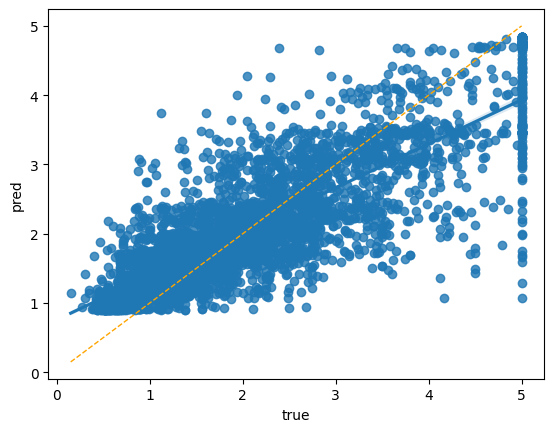

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = plt.gca()

# 傾き1の直線を追加
a_line=[df_pred.HousingPrices.min(), df_pred.HousingPrices.max()]
sns.regplot(x=df_pred.HousingPrices, y=df_pred.y_pred)
sns.regplot(x=a_line, y=a_line,ci=None, scatter=False, line_kws={'color': 'orange', 'linestyle': '--', 'lw': 1})

ax.set_xlabel('true')
ax.set_ylabel('pred')

- カテゴリカル変数を含んでいない点はbad
- ある程度の精度を持つモデルが出来ている点は良いと思う（決定係数で0.67）。許容範囲と言ったところか